<a href="https://colab.research.google.com/github/hayaabokmail/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: (Prediction of Product Sales).


- Author: Haya Abukmeil

## Project Overview

## Load and Inspect Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fpath = "/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df_salesprediction = pd.read_csv(fpath)

In [ ]:
# show he first 5 rows
df_salesprediction.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# show info about the data
df_salesprediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


###1) How many rows and columns?
- rows 8523
- columns **12**

In [ ]:
# 2) What are the datatypes of each variable?
df_salesprediction.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


## Clean Data

In [ ]:
# 3) Are there duplicates? If so, drop any duplicates.

df_salesprediction.duplicated().sum()

np.int64(0)

In [ ]:
# 4) Identify missing values.

df_salesprediction.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
# 5) Address the missing values by using a placeholder value.
df_salesprediction['Item_Weight'].fillna('missing', inplace=True)
df_salesprediction['Outlet_Size'].fillna('missing', inplace=True)

In [ ]:
# 6) Confirm that there are no missing values after addressing them.

df_salesprediction.isna().sum()


,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
# 7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).
df_salesprediction['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
# replace the incosistent categories
df_salesprediction['Item_Fat_Content'] = df_salesprediction['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')
df_salesprediction['Item_Fat_Content'] = df_salesprediction['Item_Fat_Content'].replace('reg', 'Regular')
df_salesprediction['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [ ]:
# 8) For any numerical columns, obtain the summary statistics of each (min, max, mean).
df_salesprediction.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


## Feature Inspection

## Exploratory Data Analysis

Histograms to view the distributions of numerical features in your dataset.

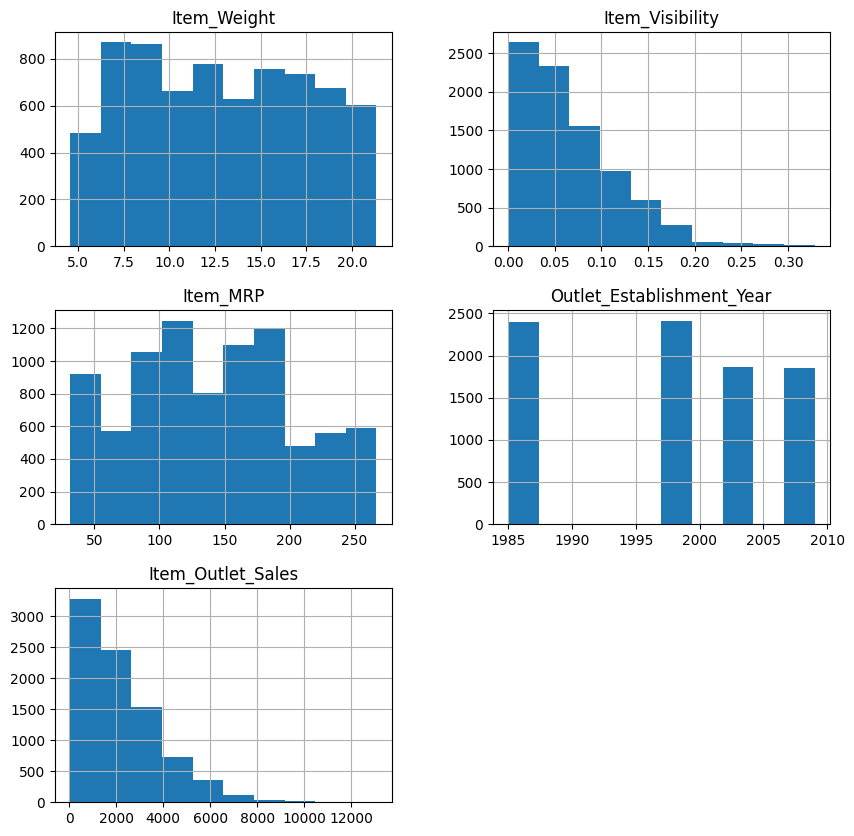

In [2]:
# Histograms to view the distributions of numerical features in your dataset.
histograms = df_salesprediction.hist(figsize=(10, 10))

Boxplots to view statistical summaries of numerical features in your dataset.

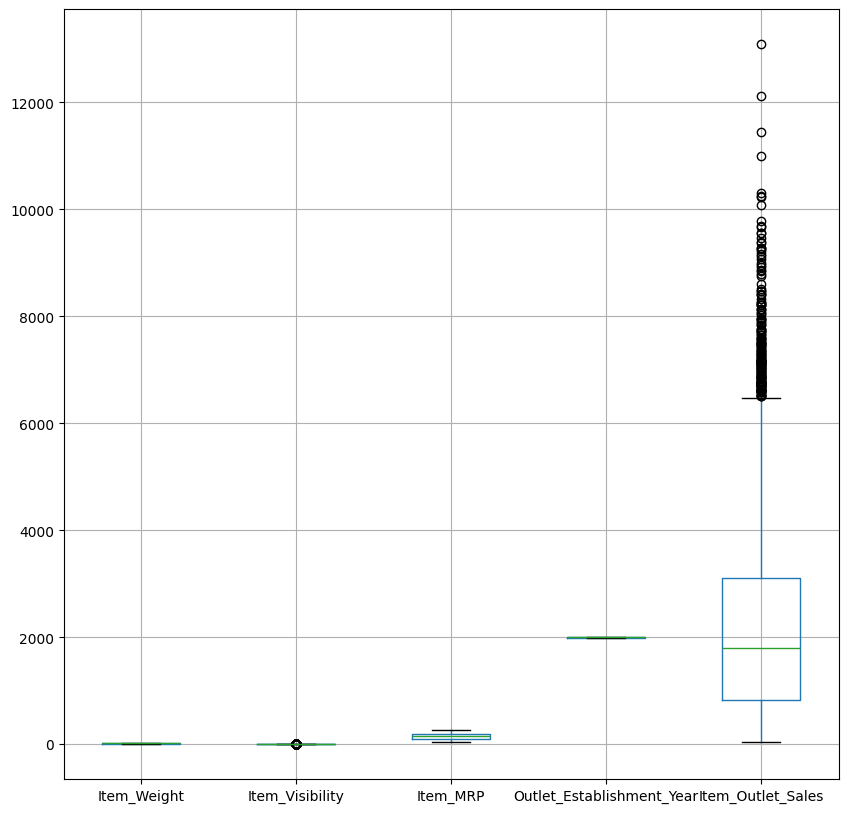

In [3]:
# Boxplots to view statistical summaries of numerical features in your dataset.
boxplots = df_salesprediction.boxplot(figsize=(10, 10))

<ipython-input-7-1a5e92a46fc7>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  countplots.set_xticklabels(countplots.get_xticklabels(), rotation=90);


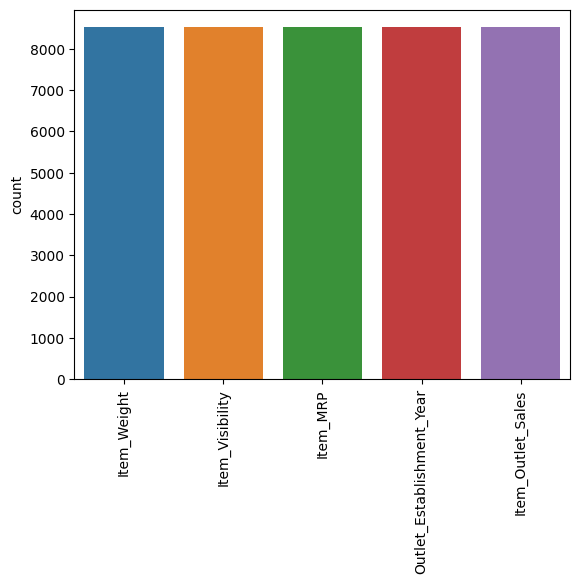

In [7]:
# Countplots to view the frequency of each class of categorial features in your dataset
countplots = sns.countplot(data=df_salesprediction);
countplots.set_xticklabels(countplots.get_xticklabels(), rotation=90);

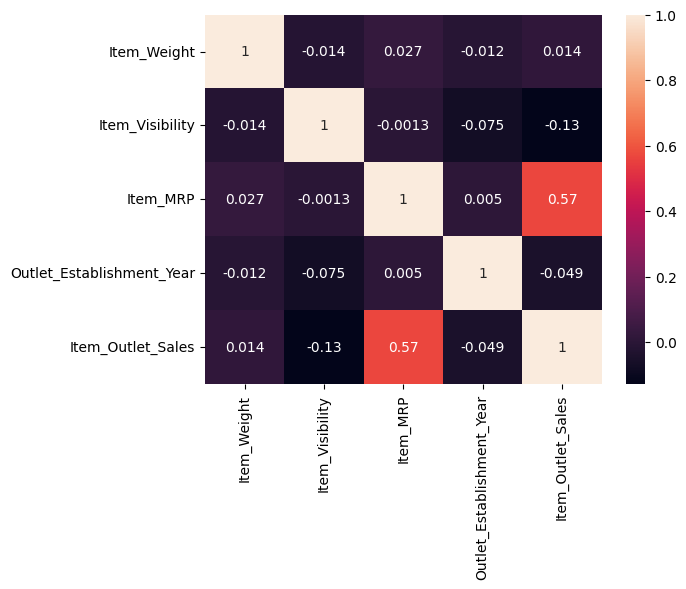

In [9]:
# Heatmap to view the correlation between features.
# Select only numerical features for correlation calculation
numerical_features = df_salesprediction.select_dtypes(include=np.number)
heatmap = sns.heatmap(numerical_features.corr(), annot=True)